In [1]:
### 导入依赖 ###
print(__doc__)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Automatically created module for IPython interactive environment


In [2]:
### 利用一个3分类问题，理解Confusion matrix 和 ROC curve #注意 pd.read_csv中sep参数的选择
y_pred = pd.read_csv("y_predicted_label.csv",sep="\t")
y_test = pd.read_csv("y_true.csv",sep="\t")
y_score = pd.read_csv("y_predicted_score.csv",sep="\t")

In [3]:
y_test

,class1,class2,class3
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
70,0,0,1
71,0,1,0
72,1,0,0
73,1,0,0


In [4]:
y_pred

,class1,class2,class3
0,0,0,1
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,0
...,...,...,...
70,0,0,1
71,0,0,0
72,1,0,0
73,1,0,0


In [5]:
y_score

,class1,class2,class3
0,-0.763011,-0.364825,0.123864
1,-0.202245,-0.631444,-0.166123
2,0.118015,-0.802631,-0.320559
3,-0.907809,-0.123955,0.021998
4,-0.011162,-0.279135,-0.718892
...,...,...,...
70,-0.414670,-0.637059,0.048387
71,-0.304362,-0.084254,-0.618647
72,0.188697,-0.887959,-0.297131
73,0.249662,-0.805075,-0.443245


In [6]:
###定义初始变量，请将fpr tpr rpc auc 定义成 dict型 ###
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()

In [7]:
# 利用一个简单循环 和 roc_curve 函数roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# 其中 y_true是 样本的真实标签
# y score 是 样本的预测得分
# 提示 利用pandas包 操作时 可以利用 pandas.iloc
for i in range(n_classes):
     fpr[i], tpr[i],_ = roc_curve(y_test.iloc[:,i], y_score.iloc[:,i])
     roc_auc[i] = auc(fpr[i], tpr[i])

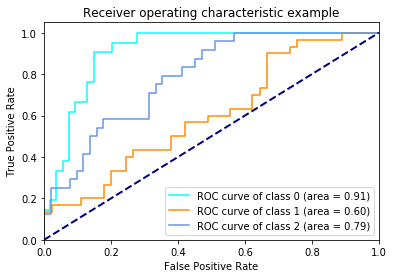

In [8]:
##利用循环 打印出上述fpr tpr 生成roc曲线
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i],tpr[i] , color=color ,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
########################################
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
#将 one-hot标签 转化为 list形式的3值标签 pred_class已经给出 请对true_class作出
pred_class= []
for i in range(len(y_pred)):
    if y_pred.iloc[i,0] == 1:
        pred_class.append('label_1')
    if y_pred.iloc[i,1] == 1:
        pred_class.append('label_2')
    if y_pred.iloc[i,2] == 1:
        pred_class.append('label_3')
    if y_pred.iloc[i,0] == y_pred.iloc[i,1] == y_pred.iloc[i,2] == 0:
        pred_class.append('no_class')
pred_class

true_class= []
for i in range(len(y_test)):
    if y_test.iloc[i,0] == 1:
        true_class.append('label_1')
    if y_test.iloc[i,1] == 1:
        true_class.append('label_2')
    if y_test.iloc[i,2] == 1:
        true_class.append('label_3')
    if y_test.iloc[i,0] == y_test.iloc[i,1] == y_test.iloc[i,2] == 0:
        true_class.append('no_class')
        

Text(0.5, 14.09375, 'Predicted label')

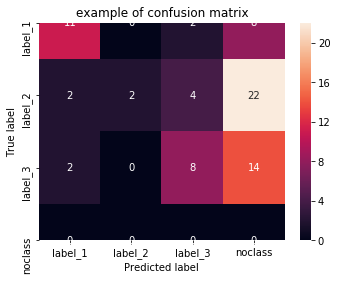

In [10]:
##利用confusion_matrix函数 生成混淆矩阵 confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]¶
cm = confusion_matrix(true_class, pred_class)
cm_df = pd.DataFrame(cm,
                     index = ['label_1','label_2','label_3','noclass'],
                     columns = ['label_1','label_2','label_3','noclass'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('example of confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [11]:
### 问题
### 上图中应该如何计算 TP TN FP FN